In [1]:
import pandas_datareader as pdr

In [3]:
df=pdr.get_data_tiingo('AAPL',api_key='')

In [4]:
df.to_csv('AAPL.csv')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('AAPL.csv')

In [16]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [17]:
df1=df.reset_index()['close']

In [18]:
df1.shape

(1258,)

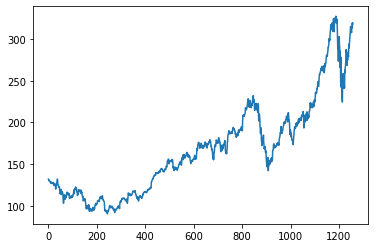

In [20]:
plt.plot(df1)

In [21]:
## LSTM are sensitive to scale of the data. so we apply minmax scaler

In [32]:
import numpy as np


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [35]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [36]:
training_size,test_size

(817, 441)

In [45]:

def create_dataset(dataset,time_step=1):
    dataX, dataY =[],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ##0,1,2,3,4,5---99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),numpy.array(dataY)    


# reshape into X=t,X=t+1,X=t+2

In [44]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [49]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [48]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [50]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [51]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [52]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 15s 21ms/sample - loss: 0.0165 - val_loss: 0.0618
Epoch 2/100
716/716 [==============================] - 6s 8ms/sample - loss: 0.0033 - val_loss: 0.0048
Epoch 3/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0011 - val_loss: 0.0045
Epoch 4/100
716/716 [==============================] - 5s 7ms/sample - loss: 8.9318e-04 - val_loss: 0.0041
Epoch 5/100
716/716 [==============================] - 5s 7ms/sample - loss: 7.4564e-04 - val_loss: 0.0054
Epoch 6/100
716/716 [==============================] - 6s 8ms/sample - loss: 6.4257e-04 - val_loss: 0.0040
Epoch 7/100
716/716 [==============================] - 5s 7ms/sample - loss: 6.8487e-04 - val_loss: 0.0040
Epoch 8/100
716/716 [==============================] - 5s 7ms/sample - loss: 6.3954e-04 - val_loss: 0.0040
Epoch 9/100
716/716 [==============================] - 5s 7ms/sample - loss: 6.2671e-04 - val_loss: 0.0040
E

716/716 [==============================] - 8s 11ms/sample - loss: 2.2537e-04 - val_loss: 0.0012
Epoch 77/100
716/716 [==============================] - 7s 10ms/sample - loss: 2.2185e-04 - val_loss: 0.0022
Epoch 78/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.2766e-04 - val_loss: 0.0014
Epoch 79/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.1149e-04 - val_loss: 0.0012
Epoch 80/100
716/716 [==============================] - 7s 10ms/sample - loss: 2.0749e-04 - val_loss: 0.0012
Epoch 81/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.0940e-04 - val_loss: 0.0011
Epoch 82/100
716/716 [==============================] - 8s 11ms/sample - loss: 2.0113e-04 - val_loss: 0.0012
Epoch 83/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.9593e-04 - val_loss: 0.0011
Epoch 84/100
716/716 [==============================] - 7s 10ms/sample - loss: 1.9748e-04 - val_loss: 0.0012
Epoch 85/100
716/716 [==========

In [57]:

import tensorflow as tf

In [58]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [61]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012330480125819493

In [64]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.03253402863344206

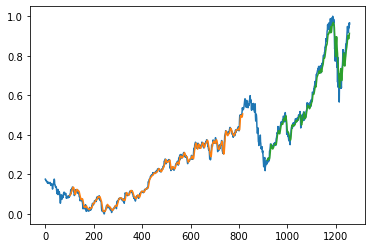

In [65]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [66]:
len(test_data)

441

In [67]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [68]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [69]:
temp_input

[0.8583551465000421,
 0.886641898167694,
 0.8743139407244787,
 0.8843198513890063,
 0.8783669678290973,
 0.8986321033521911,
 0.9258211601790087,
 0.928776492442793,
 0.9567677108840664,
 0.9386979650426412,
 0.9330406147091108,
 0.9495060373216246,
 0.9642404796082074,
 0.9551211686228152,
 0.9598919192772102,
 0.9663514312251964,
 0.9624672802499366,
 0.9229502659799036,
 0.9598497002448703,
 0.987925356750823,
 0.9859410622308538,
 0.9253145317909313,
 0.9217259140420502,
 0.9647471079962848,
 0.9757240564046272,
 0.991598412564384,
 0.9697289538123786,
 0.9761462467280251,
 0.967955754454108,
 1.0,
 0.9901629654648316,
 0.9905007177235496,
 0.9653803934813814,
 0.9848855864223591,
 0.9708688676855526,
 0.9402600692392131,
 0.8774803681499619,
 0.8348391454867854,
 0.8541332432660642,
 0.7733682344000674,
 0.7726927298826312,
 0.8801401671873681,
 0.840074305496918,
 0.896732246896901,
 0.8552731571392385,
 0.8388499535590643,
 0.7423372456303302,
 0.8232711306256859,
 0.78143206957

In [70]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9275265]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

8 day output [[0.8518207]]
9 day input [0.93869797 0.93304061 0.94950604 0.96424048 0.95512117 0.95989192
 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9

16 day output [[0.87555647]]
17 day input [0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.92752647
 0.91844857 0.904686

25 day output [[0.86551446]]
26 day input [0.96972895 0.97614625 0.96795575 1.         0.99016297 0.99050072
 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915
 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.92752647 0.91844857 0.90468633 0.89077663
 0.8782481  0.86782104 0.8598839  0.85457498 0.85182071 0.85137463
 0.85286063 0.85581541

In [93]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [94]:
import matplotlib.pyplot as plt

In [95]:

len(df1)

1258

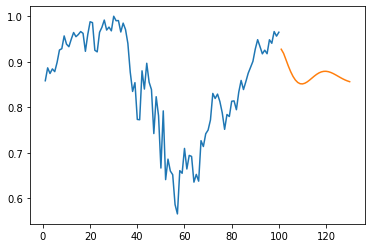

In [96]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

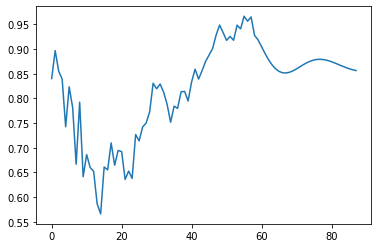

In [97]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [98]:
df3=scaler.inverse_transform(df3).tolist()

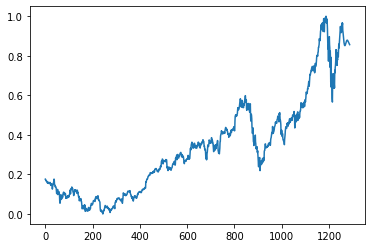

In [99]:

plt.plot(df3)